# Boundary Value Problems

Another class of ODEs are *boundary value problems* (BVPs), where conditions on the solution are given at two different values for the independent variable (instead of at only an initial time, as for the IVPs). In these problems the independent variable is often a spatial coordinate, so we denote it by $x$. A model BVP problem is the Poisson equation with Dirichlet conditions at the endpoints, for example:

$$
\begin{align*}
u''(x) &= f(x), \quad 0<x<1 \\
u(0) &= \alpha \\
u(1) &= \beta
\end{align*}
$$

This problem can be solved using finite differences. Introduce $n+2$ points between 0 and 1, a grid spacing $h = 1/(n+1)$ and a corresponding grid of points $x_j = jh$, $j=0,1,\ldots,n+1$. At each of these grid points, we will approximate the solution numerically, that is, $u_j \approx u(x_j)$. To impose the differential equations, we need to estimate the second derivative $u''(x)$ at each grid point. We can do this using finite difference approximations, for example the second-order accurate formula

$$
u''(x_j) \approx \frac{1}{h^2}(u_{j+1} - 2u_j + u_{j-1})
$$

Using this we can approximate the differential equation at all interior points:

$$
u_{j+1} - 2u_j + u_{j-1} = h^2 f(x_j), \quad j = 1,\ldots, n
$$

The boundary values are simply imposed by setting $u_0 = \alpha$ and $u_{n+1} = \beta$. This leads to a tridiagonal linear system of equations $Au=b$ where

$$
A=
\begin{bmatrix}
-2 & 1 & &  \\
1 & -2 & 1  & \\
  & & \ddots  & \\
  & & 1 & -2
\end{bmatrix}
\quad u=
\begin{bmatrix}
u_1 \\ u_2 \\ \vdots \\ u_n
\end{bmatrix}
\quad b=
\begin{bmatrix}
h^2f(x_1) - \alpha \\
h^2f(x_2) \\
\vdots \\
h^2f(x_n)-\beta
\end{bmatrix}
$$

## Example BVP

For example we consider the boundary value problem


$$
\begin{align*}
u''(x) &= 10e^{2x}\sin(2\pi x), \quad 0<x<1 \\
u(0) &= -1 \\
u(1) &= 1
\end{align*}
$$

We use a grid with $n=49$ interior points (50 intervals).

In [1]:
using PyPlot, PyCall, LinearAlgebra

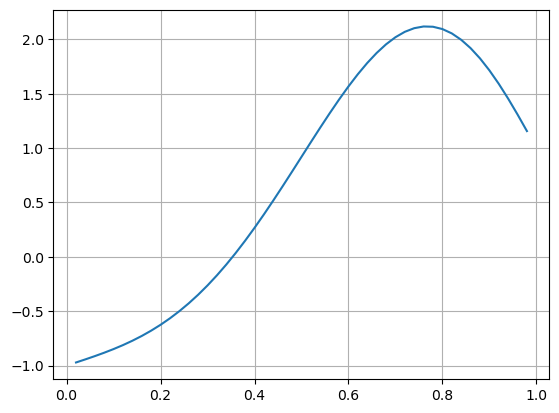

In [2]:
n = 49
h = 1 / (n+1)
x = h*(1:n)
f(x) = 10exp(2x)*sin(2π*x)

A = SymTridiagonal(-2ones(n), ones(n))
b = h^2*f.(x)
b[1] -= -1
b[end] -= 1
u = A \ b

plot(x, u)
grid(true)